In [1]:
import h5py
import numpy as np
from scipy.io import readsav

save_h5 = 'Res/results_2016case.h5'
figname = 'Figs/sza_vs_alt_2016case.png'

# N = 9234250

with h5py.File(save_h5, 'r') as f:
    
    pred = np.sqrt(np.mean(np.array(f['Y_pred_MLP'])**2, axis=1))
    Y = np.sqrt(np.mean(np.array(f['Y'])**2, axis=1))
    X = np.array(f['X'])
    leng = np.array(f['len'])

filename = 'Mars.save'
data = readsav(filename)

############## denormalize & retrieve ####################
alt_mean = data['altitude'].flatten().mean()
alt_std = data['altitude'].flatten().std()
altitude = X[:, 11] * alt_std + alt_mean
sza = np.rad2deg(np.arccos(X[:, 10].flatten()))

print('the shape of sza: {}'.format(sza.shape))
print('the shape of altitude: {}'.format(altitude.shape))
print('the shape of pred: {}'.format(pred.shape))
print('the shape of Y: {}'.format(Y.shape))




the shape of sza: (24958,)
the shape of altitude: (24958,)
the shape of pred: (24958,)
the shape of Y: (24958,)


/media/faraday/andong/Workspace/Mars/funs.py:406: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle


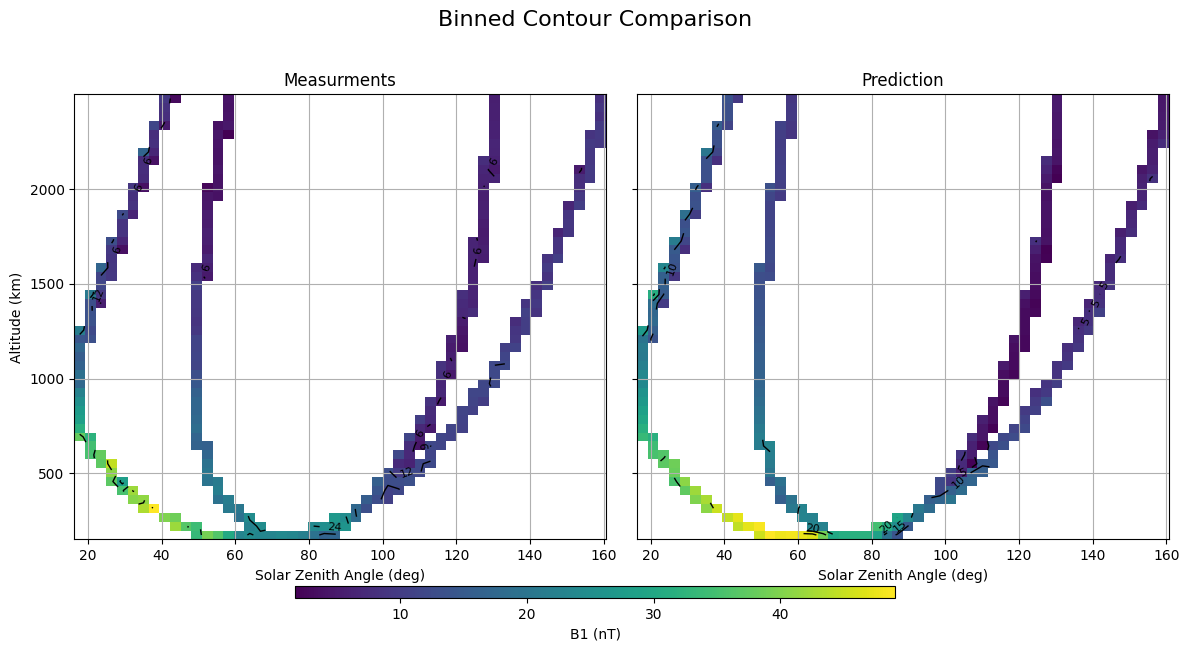

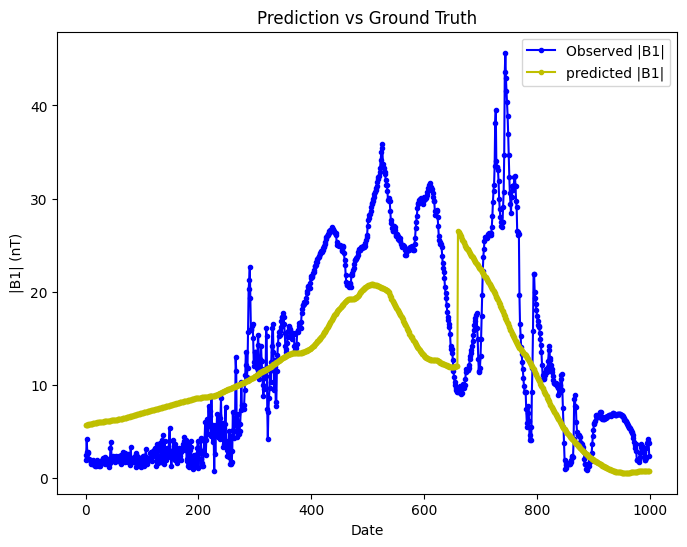

In [2]:
from funs import plot_dual_binned_prediction_contour, plot_prediction_comparison

idx = np.where(altitude<2500)[0]

plot_dual_binned_prediction_contour(
    sza = sza, 
    altitude = altitude, 
    predict = pred,
    measure = Y,
    idx_sel=idx,
    bins=50,
    figname = 'Figs/B1_sza_vs_alt.png',
    )

plot_prediction_comparison(
    pred=pred[3500:4500],
    Y=Y[3500:4500],
    bins=50,
    figname='Figs/B1_pred_vs_true.png'
)

In [ ]:
def calculate_correlation(data1, data2):
  """
  Calculates the Pearson correlation coefficient between two datasets.

  Args:
    data1: A list or numpy array representing the first dataset.
    data2: A list or numpy array representing the second dataset.

  Returns:
    The Pearson correlation coefficient between the two datasets.
    Returns None if the datasets are empty or have different lengths.
  """
  if not data1 or not data2 or len(data1) != len(data2):
    return None
  return np.corrcoef(data1, data2)[0, 1]

correlation = calculate_correlation(pred, Y)